In [3]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [4]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('AUDIO_DIR')

# Load metadata and features.
tracks = utils.load('data/fma_metadata/tracks.csv')
genres = utils.load('data/fma_metadata/genres.csv')
features = utils.load('data/fma_metadata/features.csv')
echonest = utils.load('data/fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

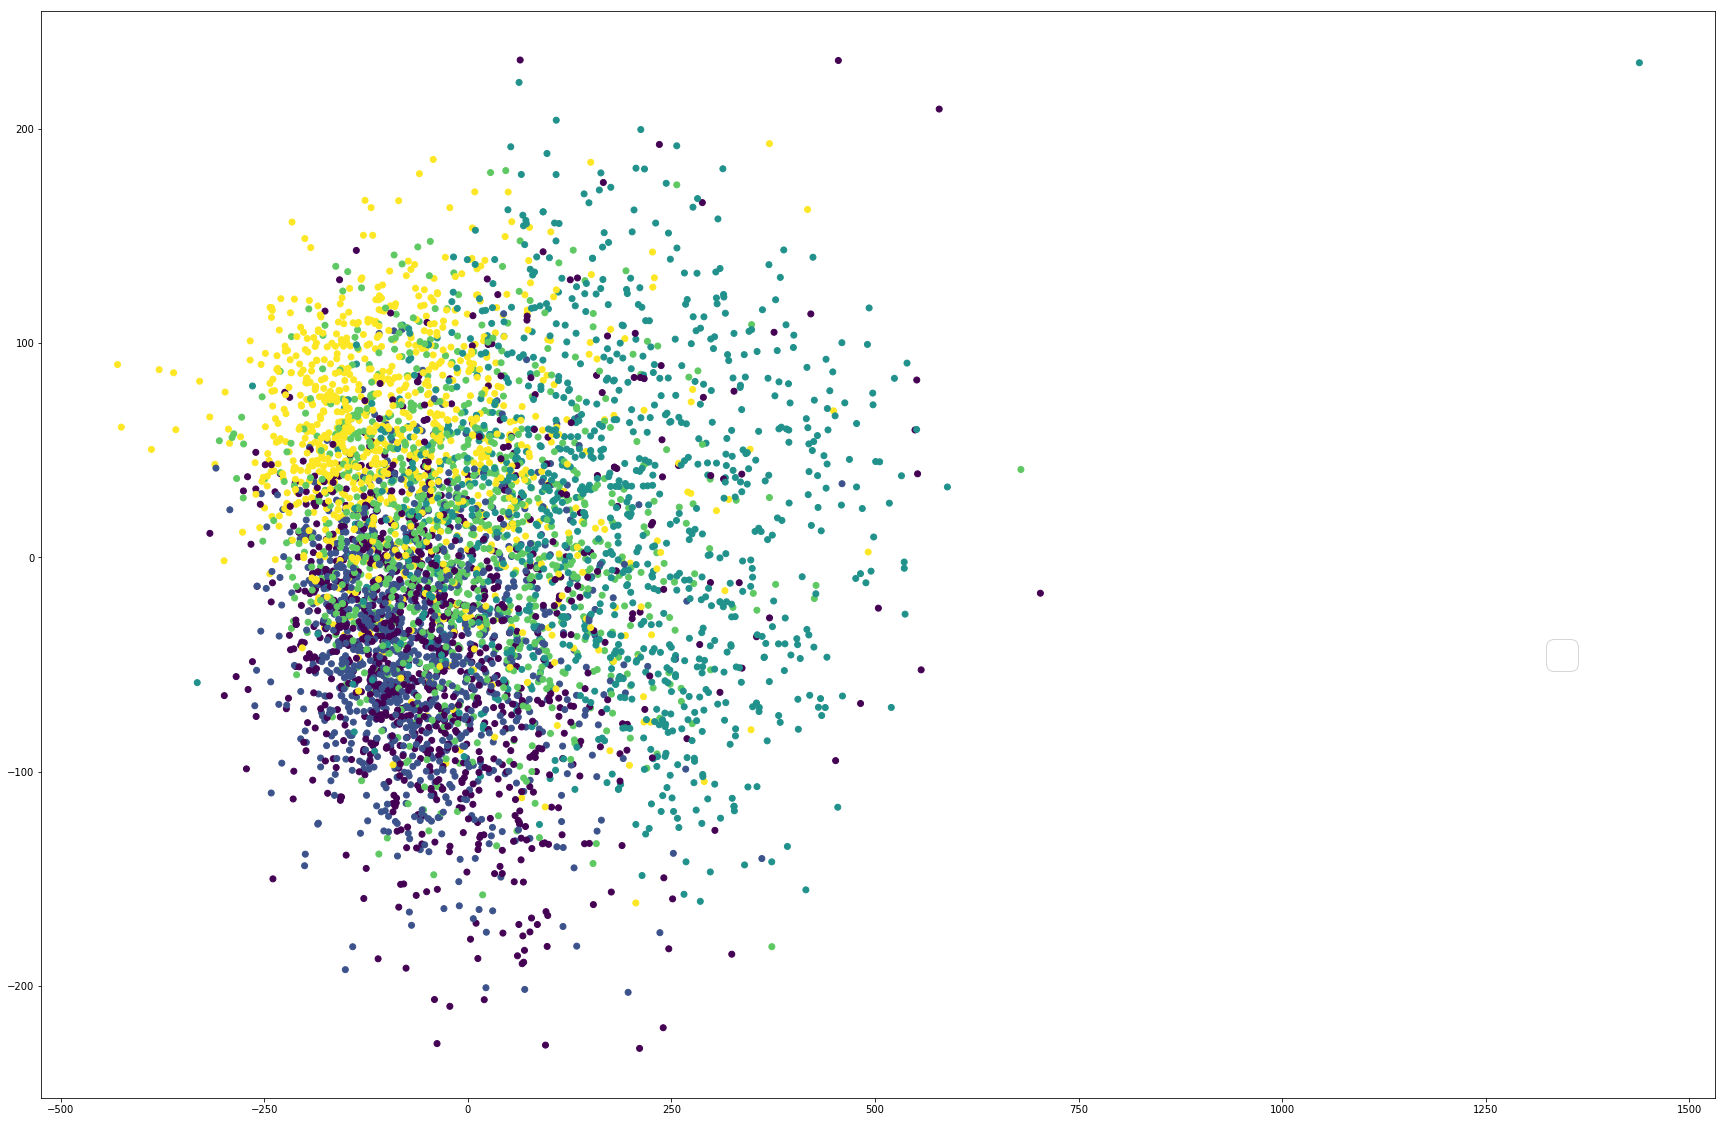

In [6]:
small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks['track', 'genre_top'] == 'Hip-Hop'
genre3 = tracks['track', 'genre_top'] == 'Rock'
genre4 = tracks['track', 'genre_top'] == 'Pop'
genre5 = tracks['track', 'genre_top'] == 'Electronic'
genre6 = tracks['track', 'genre_top'] == 'Classical'
genre7 = tracks['track', 'genre_top'] == 'Indie-Rock'
classes =['Instrumental', 'Hip-Hop', 'Rock', 'Pop', 'Electronic',
                                                              'Classical','Indie-Rock']
plt.figure(figsize = (30, 20))
plt.legend(classes, bbox_to_anchor=(0.93, 0.44), fontsize=40)

X = features.loc[small & (genre1 | genre2 | genre3 |  genre4 | genre5 | genre6 | genre7), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (genre1 | genre2 |  genre3 | genre4 | genre5 | genre6 | genre7), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)


plt.scatter(X[:,0], X[:,1], c=y)
X.shape, y.shape
plt.savefig("PCA_Scatter_fma.png")